In [20]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

#### Importing dataset

In [32]:
file="ecg.csv"
df=pd.read_csv(file)
df.head(1)

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col132,col133,col134,col135,col136,col137,col138,col139,col140,label
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.25774,0.228077,0.123431,0.925286,0.193137,1


In [22]:
df.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col132,col133,col134,col135,col136,col137,col138,col139,col140,label
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, col1 to label
dtypes: float64(140), int64(1)
memory usage: 5.4 MB


#### Segregating Dataframe into features and Label

In [55]:
label=df.label 
data=df.iloc[:,:-1]

In [57]:
print(label.shape,data.shape)

(4998,) (4998, 140)


#### Standard Scaling of Data

In [58]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_df=ss.fit_transform(data)

In [59]:
scaled_df.shape

(4998, 140)

#### Applying PCA 

In [60]:
from sklearn.decomposition import PCA
pca=PCA(2)
x_pca=pca.fit_transform(scaled_df)

In [61]:
x_pca

array([[-6.18520213, -3.70406838],
       [-1.96372762, -6.46797035],
       [-5.70890716, -4.11684743],
       ...,
       [ 3.5068085 ,  0.22519074],
       [-0.47464683, 12.69330007],
       [ 6.58511773, -0.70606655]])

#### Analyzing Variance Ratio

In [62]:
explained_var_range=pca.explained_variance_ratio_
explained_var_range

array([0.32349802, 0.19859368])

#### Visualization of PCA Variance Ratio

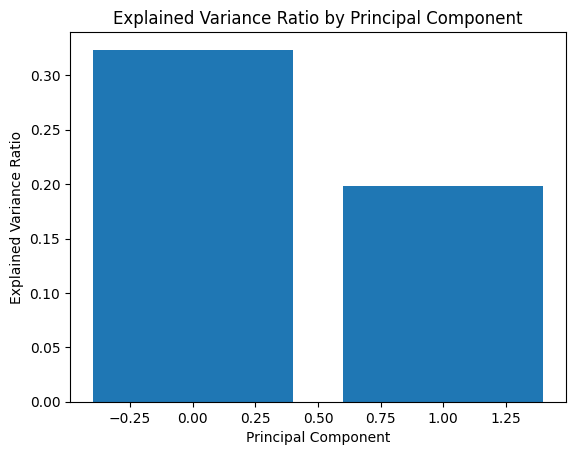

In [63]:
plt.bar(range(2),explained_var_range)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

#### Visualization of Reduced Data in 2D Scatter.

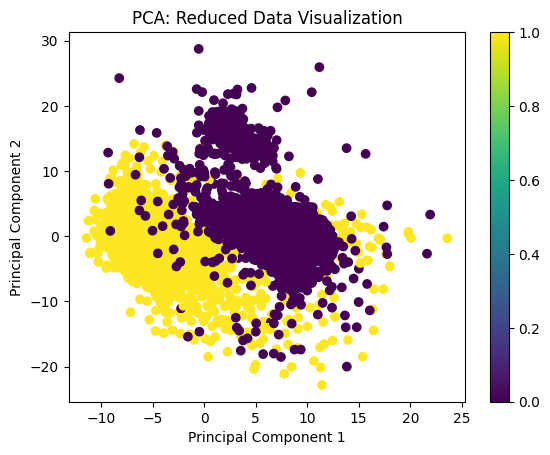

In [71]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=label,cmap="viridis")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Reduced Data Visualization')
plt.colorbar()
plt.show()

#### PCA using 2 components has been done here. But our task is to reach best Model to Classify the data for Heat Failure.